Authors:

### This Jupyter Notebook file runs a multilayer perceptron (MLP) algorithm on _____ data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import loguniform

In [2]:
df=pd.read_csv('/content/real_estate_dataset/realest_data.csv', index_col=False)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
X = df.drop(['Y house price of unit area'], axis=1)
y = df['Y house price of unit area']

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
model = MLPRegressor(hidden_layer_sizes=(16, 32, 64, 128, 246, 128, 64, 32, 16), max_iter=1000, random_state=42, learning_rate='adaptive', early_stopping = True)

model.fit(X_train, y_train)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print(f"Cross-validation R² scores: {cv_scores}")
print(f"Average CV R² score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-validation R² scores: [0.40674665 0.62845876 0.65303391 0.52691342 0.45962219]
Average CV R² score: 0.5350 (+/- 0.1894)


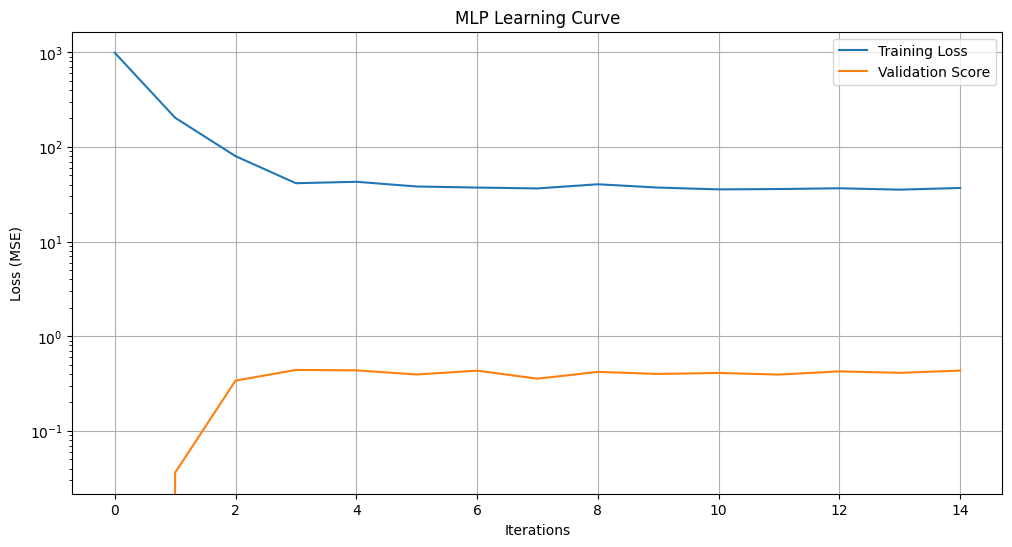

In [28]:
# Create the loss curve plot
plt.figure(figsize=(12, 6))

# Plot the loss curve
plt.plot(model.loss_curve_, label='Training Loss')
if hasattr(model, 'validation_scores_'):
    plt.plot(model.validation_scores_, label='Validation Score')

plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('MLP Learning Curve')
plt.yscale('log')  # Log scale for better visualization
plt.grid(True)
plt.legend()


In [29]:
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results = {
    'MSE': mse,
    'RMSE': np.sqrt(mse),
    'R2': r2
}

In [31]:
results

{'MSE': 70.2388468591741, 'RMSE': 8.380861940109389, 'R2': 0.5813128646563013}